In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np
import os
import PIL
import PIL.Image
import glob

import cv2

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [3]:
x_train = []
y_train = []

x_val = []
y_val = []

count = 0

path = "chest_xray/train/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    if (count % 10 == 0):
        x_val.append(img)
        y_val.append(int(0))
    else:
        x_train.append(img)
        y_train.append(int(0))
    count = count + 1

count = 0

path = "chest_xray/train/PNEUMONIA"
for image_name in os.listdir(path):

    img = cv2.imread(os.path.join(path,image_name))
    if (count % 10 == 0):
        x_val.append(img)
        y_val.append(int(1))
    else:
        x_train.append(img)
        y_train.append(int(1))
    count = count + 1



path = "chest_xray/val/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(0))

path = "chest_xray/val/PNEUMONIA"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(1))

In [4]:
print(img.shape)


(864, 1256, 3)


In [5]:
# Resize all the images to 128 x 128 and set to Greyscale

endTrain = len(x_train)
endVal = len(x_val)

for image in range(0,endTrain):
    x_train[image] = tf.image.resize_with_pad(x_train[image],128,128)
    x_train[image] = tf.image.rgb_to_grayscale(x_train[image])

for image in range(0,endVal):
    x_val[image] = tf.image.resize_with_pad(x_val[image],128,128)
    x_val[image] = tf.image.rgb_to_grayscale(x_val[image])

2022-09-11 11:08:38.594537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21346 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:0a:00.0, compute capability: 8.6


(4693, 128, 128, 1)
(539, 128, 128, 1)


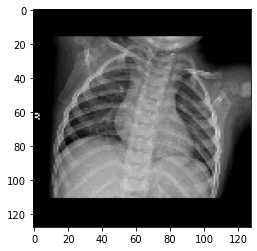

In [6]:
#  Convert to numpy array and check image

x_train = np.asarray(x_train, dtype=int)
y_train = np.asarray(y_train, dtype=int)
x_val = np.asarray(x_val, dtype=int)
y_val = np.asarray(y_val, dtype=int)

print(x_train.shape)
print(x_val.shape)
plt.imshow(x_train[0], cmap='gray')

In [7]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

y_val= np.asarray(y_val).astype('float32').reshape((-1,1))

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4693, 128, 128, 1)
(4693, 1)
(539, 128, 128, 1)
(539, 1)


In [10]:
# end = len(x_train)

# x_dataAug = []
# y_dataAug = []
# for image in range(0,end):
#     x_dataAug.append(multiply(x_train[image]))
#     y_dataAug.append(y_train[image])
#     x_dataAug.append(screen(x_train[image]))
#     y_dataAug.append(y_train[image])

In [11]:
# Save the processed x_train files

# end = len(x_train)
# path = 'chest_xray/processed'
# saveImages = np.asarray(x_train)
# # saveImages = saveImages * 255
# saveImages = saveImages.astype("int64")
# for image in range(0,end):
#     cv2.imwrite(os.path.join(path, str(image) + '.jpg'),saveImages[image])

In [12]:
# pretrained_base = tf.keras.applications.vgg19.VGG19(
#     include_top=False, weights='imagenet', input_tensor=None,
#     input_shape=[224,224,3], pooling=None, classes=None,
#     classifier_activation=None
# )

In [9]:
model = tf.keras.Sequential([
   # Model Creation 
 
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[128, 128, 1]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
     layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=1, activation="sigmoid"),
])

In [10]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [11]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/20


2022-09-11 11:09:11.527206: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8303
2022-09-11 11:09:14.099233: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


147/147 [==============================] - 23s 119ms/step - loss: 1.2960 - accuracy: 0.8802 - val_loss: 10.1820 - val_accuracy: 0.7347
Epoch 2/20
147/147 [==============================] - 12s 82ms/step - loss: 0.9122 - accuracy: 0.9177 - val_loss: 10.9991 - val_accuracy: 0.7347
Epoch 3/20
147/147 [==============================] - 12s 83ms/step - loss: 0.7689 - accuracy: 0.9331 - val_loss: 0.3967 - val_accuracy: 0.9518
Epoch 4/20
147/147 [==============================] - 12s 84ms/step - loss: 0.4638 - accuracy: 0.9508 - val_loss: 0.4128 - val_accuracy: 0.9555
Epoch 5/20
147/147 [==============================] - 12s 83ms/step - loss: 0.5169 - accuracy: 0.9550 - val_loss: 0.8744 - val_accuracy: 0.9239
Epoch 6/20
147/147 [==============================] - 12s 84ms/step - loss: 0.3851 - accuracy: 0.9633 - val_loss: 0.1295 - val_accuracy: 0.9777
Epoch 7/20
147/147 [==============================] - 12s 85ms/step - loss: 0.2345 - accuracy: 0.9753 - val_loss: 0.2707 - val_accuracy: 0.9573


In [12]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #normalize between 0 & 1
    img = img.astype("float32") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #normalize between 0 & 1
    img = img.astype("float32") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img


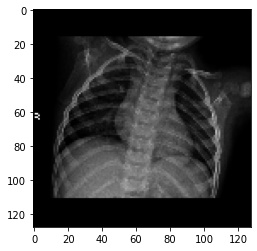

In [13]:
test = multiply(x_train[0])
plt.imshow(test, cmap='gray')

In [14]:
end = len(x_train)

x_dataAug = []
y_dataAug = []
for image in range(0,end):
    x_dataAug.append(multiply(x_train[image]))
    y_dataAug.append(y_train[image])
    x_dataAug.append(screen(x_train[image]))
    y_dataAug.append(y_train[image])

In [18]:
# y_dataAug = np.asarray(y_dataAug).astype('float32').reshape((-1,1))
y_dataAug = np.asarray(y_dataAug)
# x_dataAug = np.asarray(x_dataAug)

In [19]:
print(y_dataAug.shape)
print(x_dataAug.shape)

(9386, 1)
(9386, 128, 128, 1)


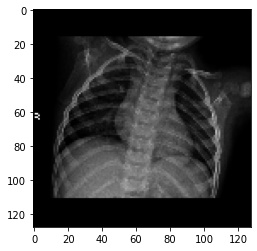

In [20]:
plt.imshow(x_dataAug[0], cmap='gray')

In [21]:
model = tf.keras.Sequential([
   # Model Creation 
 
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[128, 128, 1]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
     layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=1, activation="sigmoid"),
])

In [22]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_dataAug,y_dataAug,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/20
294/294 [==============================] - 26s 87ms/step - loss: 4.7367 - accuracy: 0.8416 - val_loss: 2541.7771 - val_accuracy: 0.5659
Epoch 2/20
294/294 [==============================] - 24s 81ms/step - loss: 1.2272 - accuracy: 0.9038 - val_loss: 4631.1489 - val_accuracy: 0.4100
Epoch 3/20
294/294 [==============================] - 24s 81ms/step - loss: 0.6213 - accuracy: 0.9273 - val_loss: 2091.1602 - val_accuracy: 0.6679
Epoch 4/20
294/294 [==============================] - 24s 82ms/step - loss: 0.4105 - accuracy: 0.9393 - val_loss: 1830.9838 - val_accuracy: 0.6642
Epoch 5/20
294/294 [==============================] - 24s 82ms/step - loss: 0.2855 - accuracy: 0.9490 - val_loss: 2652.7405 - val_accuracy: 0.4917
Epoch 6/20
294/294 [==============================] - 24s 83ms/step - loss: 0.2759 - accuracy: 0.9521 - val_loss: 2607.5779 - val_accuracy: 0.4917
Epoch 7/20
294/294 [==============================] - 24s 82ms/step - loss: 0.1952 - accuracy: 0.9573 - val_loss: 1597

In [23]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/20
147/147 [==============================] - 13s 84ms/step - loss: 0.0572 - accuracy: 0.9844 - val_loss: 0.2021 - val_accuracy: 0.9573
Epoch 2/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0439 - accuracy: 0.9874 - val_loss: 0.1123 - val_accuracy: 0.9703
Epoch 3/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0602 - accuracy: 0.9832 - val_loss: 0.0909 - val_accuracy: 0.9685
Epoch 4/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0984 - val_accuracy: 0.9740
Epoch 5/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0267 - accuracy: 0.9906 - val_loss: 0.1749 - val_accuracy: 0.9685
Epoch 6/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.0936 - val_accuracy: 0.9722
Epoch 7/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0746 - val_accuracy: